<a href="https://colab.research.google.com/github/simeonis/INFO40975-Abalone-Sex-Classification/blob/main/Abalone_Sex_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Installing Pycaret

In [ ]:
!pip install pycaret

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# 2.0 Getting the data

### 2.1 Get and label the data

In [3]:
import pandas as pd
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names=["sex","length","diameter","height","w_weight", "s_weight", "v_weight", "sh_weight", "rings"], header=None)
dataset.head()

,sex,length,diameter,height,w_weight,s_weight,v_weight,sh_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### 2.2 Withhold 10% of the data for prediction purposes

In [4]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3759, 9)
Unseen Data For Predictions: (418, 9)


# 3.0 Setting up the environment in PyCaret

In [32]:
from pycaret.classification import *
abalone = setup(data = data, target = 'sex', session_id=123)

,Description,Value
0,session_id,123
1,Target,sex
2,Target Type,Multiclass
3,Label Encoded,"F: 0, I: 1, M: 2"
4,Original Data,"(3759, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='sex',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

# 4.0 Comparing all available PyCaret models

In [33]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5519,0.7535,0.5475,0.5433,0.5311,0.3215,0.3303,0.138
gbc,Gradient Boosting Classifier,0.5477,0.7457,0.5457,0.5361,0.5364,0.3170,0.3203,0.874
rf,Random Forest Classifier,0.5450,0.7403,0.5460,0.5383,0.5395,0.3152,0.3165,0.341
et,Extra Trees Classifier,0.5443,0.7420,0.5454,0.5362,0.5384,0.3142,0.3153,0.279
ada,Ada Boost Classifier,0.5439,0.7189,0.5438,0.5339,0.5318,0.3126,0.3163,0.121
lda,Linear Discriminant Analysis,0.5405,0.7459,0.5385,0.5346,0.5298,0.3057,0.3098,0.015
lightgbm,Light Gradient Boosting Machine,0.5374,0.7350,0.5383,0.5326,0.5330,0.3037,0.3050,0.164
ridge,Ridge Classifier,0.5340,0.0000,0.5329,0.5151,0.5113,0.2975,0.3046,0.011
qda,Quadratic Discriminant Analysis,0.5245,0.7356,0.5322,0.5094,0.5003,0.2903,0.3003,0.014
nb,Naive Bayes,0.5226,0.7344,0.5398,0.5037,0.4738,0.2946,0.3171,0.012


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


# 5.0 Create the top 3 models

### 5.1 Logistic Regression

In [7]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5492,0.7646,0.5503,0.5423,0.5373,0.3208,0.3252
1,0.5399,0.7266,0.5381,0.5248,0.5254,0.3058,0.3099
2,0.5475,0.7521,0.5451,0.5356,0.5345,0.3169,0.3208
3,0.5057,0.7455,0.5052,0.4965,0.4904,0.2544,0.2591
4,0.5741,0.7577,0.5704,0.5592,0.5555,0.3562,0.3628
5,0.5703,0.7626,0.5665,0.5605,0.5577,0.3506,0.3553
6,0.5133,0.7426,0.5138,0.4936,0.4936,0.2667,0.2715
7,0.5665,0.7649,0.5650,0.5545,0.5475,0.3453,0.3524
8,0.5779,0.7685,0.5799,0.5559,0.5560,0.3655,0.3724


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [8]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### 5.2 Gradient Boosting Classifier

In [9]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5379,0.7462,0.5392,0.5306,0.5324,0.3041,0.3051
1,0.4867,0.6824,0.4831,0.4743,0.4731,0.2236,0.2276
2,0.5627,0.7509,0.5602,0.5500,0.5531,0.3407,0.3428
3,0.5057,0.7252,0.5002,0.4948,0.4886,0.2506,0.2571
4,0.4981,0.7259,0.4950,0.4845,0.4875,0.2411,0.2434
5,0.5703,0.7633,0.5699,0.5647,0.5652,0.3518,0.3533
6,0.5323,0.7272,0.5341,0.5248,0.5270,0.2954,0.2962
7,0.6046,0.7875,0.5994,0.5999,0.5944,0.4012,0.4068
8,0.5475,0.7476,0.5487,0.5255,0.5307,0.3189,0.3222


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [10]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### 5.3 Random Forest Classifier



In [11]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5530,0.7543,0.5564,0.5469,0.5493,0.3283,0.3286
1,0.5171,0.6951,0.5162,0.5149,0.5145,0.2719,0.2729
2,0.5437,0.7504,0.5479,0.5352,0.5369,0.3169,0.3184
3,0.5133,0.7275,0.5107,0.5044,0.5057,0.2654,0.2672
4,0.5133,0.7253,0.5132,0.5129,0.5127,0.2667,0.2670
5,0.5475,0.7642,0.5494,0.5433,0.5450,0.3189,0.3191
6,0.5171,0.7138,0.5200,0.5135,0.5151,0.2736,0.2737
7,0.6008,0.7714,0.6017,0.5959,0.5973,0.3988,0.3994
8,0.5551,0.7572,0.5607,0.5353,0.5385,0.3343,0.3383


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [12]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


# 6.0 Tune the selected models

### 6.1 Logistic Regression Tuning

In [13]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5606,0.7624,0.5607,0.5545,0.5473,0.3374,0.3428
1,0.5437,0.7229,0.5402,0.5293,0.5259,0.3105,0.3166
2,0.5551,0.7485,0.5526,0.5483,0.5413,0.3282,0.3336
3,0.5171,0.7434,0.5153,0.5131,0.5024,0.2708,0.2765
4,0.5779,0.7560,0.5741,0.5662,0.5607,0.3618,0.3685
5,0.5741,0.7618,0.5697,0.5720,0.5636,0.3552,0.3609
6,0.5057,0.7376,0.5053,0.4844,0.4862,0.2543,0.2586
7,0.5817,0.7652,0.5787,0.5707,0.5609,0.3673,0.3760
8,0.5513,0.7628,0.5508,0.5293,0.5282,0.3235,0.3303


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [14]:
print(tuned_lr)

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### 6.2 Gradient Boosting Classifier Tuning

In [15]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5417,0.7486,0.5421,0.5347,0.5350,0.3088,0.3107
1,0.5133,0.7098,0.5064,0.4919,0.4880,0.2614,0.2710
2,0.5817,0.7581,0.5794,0.5705,0.5736,0.3699,0.3716
3,0.5399,0.7407,0.5338,0.5372,0.5222,0.3023,0.3111
4,0.5323,0.7484,0.5303,0.5221,0.5246,0.2941,0.2957
5,0.5551,0.7603,0.5523,0.5465,0.5453,0.3270,0.3307
6,0.5627,0.7333,0.5628,0.5601,0.5590,0.3403,0.3418
7,0.5817,0.7769,0.5783,0.5751,0.5693,0.3670,0.3728
8,0.5285,0.7547,0.5310,0.5002,0.5085,0.2917,0.2948


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [16]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### 6.3 Random Forest Classifier Tuning

In [17]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5303,0.7448,0.5429,0.5149,0.5089,0.3015,0.3100
1,0.5399,0.7131,0.5475,0.5367,0.5310,0.3135,0.3179
2,0.5171,0.7529,0.5279,0.5039,0.4956,0.2821,0.2912
3,0.5513,0.7381,0.5577,0.5433,0.5428,0.3294,0.3322
4,0.5437,0.7472,0.5564,0.5402,0.5268,0.3221,0.3322
5,0.5741,0.7712,0.5844,0.5670,0.5613,0.3654,0.3716
6,0.5399,0.7413,0.5504,0.5317,0.5292,0.3138,0.3183
7,0.6122,0.7844,0.6190,0.6045,0.6027,0.4203,0.4242
8,0.5665,0.7672,0.5782,0.5509,0.5420,0.3551,0.3656


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [18]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


### `The best model after tunning based on accuracy is Logistic Regression.`

# 7.0 Plot the model

### 7.1 Confusion Matrix

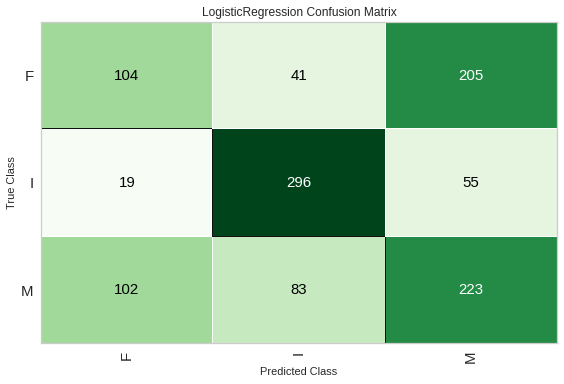

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [19]:
plot_model(tuned_lr, plot = 'confusion_matrix')

### 7.2 Classification Report

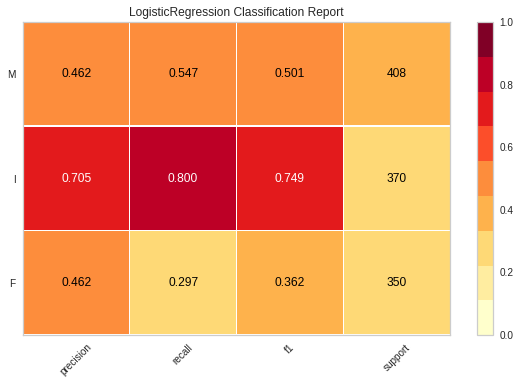

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [20]:
plot_model(tuned_lr, plot = 'class_report')

### 7.3 Decision Boundary Plot

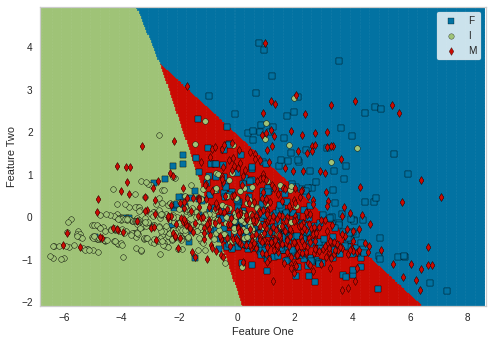

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [21]:
plot_model(tuned_lr, plot='boundary')

### 7.4 Prediction Error Plot

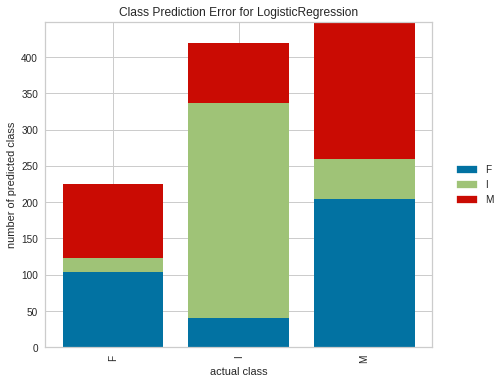

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [23]:
plot_model(tuned_lr, plot = 'error')

# 8.0 Predict on test sample

In [24]:
predict_model(tuned_lr)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5523,0.7615,0.5479,0.5416,0.5391,0.3228,0.3275


,height,v_weight,rings,w_weight,diameter,s_weight,sh_weight,length,sex,Label,Score
0,0.152836,-0.194813,0.340853,0.157123,0.540787,0.126297,0.282486,0.272916,I,M,0.4373
1,-1.366478,-1.291834,-1.211753,-1.368273,-1.865402,-1.327224,-1.364076,-1.754981,M,I,0.8059
2,-0.226993,-0.483740,1.272417,-0.558570,-0.511921,-0.700435,-0.368315,-0.430640,F,M,0.4363
3,0.532664,0.987984,-0.590710,0.649414,0.841560,0.651991,0.584771,1.017857,F,F,0.4581
4,-0.606821,-0.781697,-0.901232,-0.735472,-0.411663,-0.624052,-0.855527,-0.389255,I,I,0.6773
...,...,...,...,...,...,...,...,...,...,...,...
1123,-1.619697,-1.436298,-1.522274,-1.488566,-2.166175,-1.446292,-1.506328,-2.210223,I,I,0.8389
1124,0.026227,-0.027777,0.030332,0.002460,0.440529,-0.044441,0.186467,0.479844,M,M,0.3866
1125,0.279446,0.152803,-0.590710,0.169253,0.590916,0.065640,0.378506,0.479844,M,M,0.3815
1126,2.051979,2.220440,1.272417,1.579410,1.292721,1.173192,1.537858,1.266171,F,F,0.5975


# 9.0 Finalize model for deployment

In [ ]:
final_lr = finalize_model(tuned_lr)

In [26]:
print(final_lr)

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# 10.0 Predict on unseen data

In [27]:
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.0,0.7407,0,0,0,0,0


,sex,length,diameter,height,w_weight,s_weight,v_weight,sh_weight,rings,Label,Score
0,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,I,0.6982
1,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,I,0.5440
2,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.205,10,M,0.3716
3,M,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,7,I,0.7872
4,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.200,9,M,0.3978


# Saving the model

In [28]:
save_model(final_lr, 'Final LR Model 01Dec2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=Final LR Model 01Dec2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='sex',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                     

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='sex',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                     top_features_to_pick=0.19999999999999996)),
                 ('fix_multi', 'passthrough'), ('dfs', 'passthrough'),
                 ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegr

# Loading the saved model

In [29]:
saved_final_lr = load_model('Final LR Model 01Dec2022')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final LR Model 01Dec2022, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [30]:
new_prediction = predict_model(saved_final_lr, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='sex',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                                                    top_features_to_pick=0.19999999999999996)),
                ('fix_multi', 'passthrough'), ('dfs', 'passthrough'),
                ('pca', 'passthrough'),
        

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.0,0.7407,0,0,0,0,0


In [31]:
new_prediction.head()

,sex,length,diameter,height,w_weight,s_weight,v_weight,sh_weight,rings,Label,Score
0,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,I,0.6982
1,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,I,0.5440
2,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.205,10,M,0.3716
3,M,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,7,I,0.7872
4,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.200,9,M,0.3978
